In [1]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1
---

### Part 1.1

#### Assumptions <a id="assumptions"></a>
1. I am assuming that the inbuilt cos(x) function approximates the "real" value of the the cosine function appropriately - this is the foundation of the model error.
2. I am assuming that the value of math.pi gives me the "real" value of pi

#### Graph inbuilt $cos(x)$ function

In [2]:
def plot_real_cos(domain_start, domain_end, spacing):
    x = np.linspace(domain_start, domain_end, spacing)
    y = np.cos(x)
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('cos(x)')
    plt.title('cos(x) plot')
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.plot(x, y)
    plt.show()

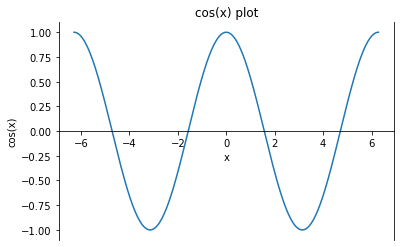

In [3]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000
plot_real_cos(domain_start, domain_end, spacing)

#### Deriving the taylor series

The taylor series provides an approximation for a given function represented as the sum of infinite terms expressed in in terms of the functions' derivates centered at particular point.

A taylor series centered around the point 0 has a special name - Maclaurin series, i.e. Maclaurin series is a special case of the taylor series.

$$
\begin{align*}
& f(x) = f(c) + f'(c)(x-c) + f''(c)\frac{(x-c)^2}{2!} + f'''(c)\frac{(x-c)^3}{3!} + .... \\

& \text{where, } \\

& c = 0 \text{ i.e point the function is centered around} \\
\end{align*}
$$

Finding the derivative of the function

$$
\begin{align*}

& f(x)      = cos(x)    = cos(0)    = 1   \\
& f'(x)     = -sin(x)   = -sin(0)   = 0   \\
& f''(x)    = -cos(x)   = -cos(0)   = -1  \\
& f'''(x)   = sin(x)    = sin(0)    = 0   \\
& f''''(x)  = cos(x)    = cos(0) = 1   \\

\end{align*}
$$

Using the above values in the formula for $f(x) = cos(x)$

$$
cos(x) = 1 + [0(x-0)] + [(-1)\frac{(x-0)^2}{2!}] + [0\frac{(x-0)^3}{3!}] + [(1)\frac{(x-0)^4}{4!}]....
$$

##### Series formula
$$
\begin{align*}
& \sum^{\infty}_{n=0} (-1)^n * \frac{x^{2n}}{(2n)!}, x \in (-\infty, \infty)
\end{align*}
$$


In [4]:
def taylor_cos(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i) / math.factorial(2*i)) for i in range(n)])

#### Graphing the taylor series function truncated up to 10 intervals

In [5]:
def plot_taylor_cos(domain_start, domain_end, spacing, truncate):
    x = np.linspace(domain_start, domain_end, spacing)
    y = [taylor_cos(i, truncate) for i in x]
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('cos(x)')
    plt.title('taylor series cos(x) plot truncated at n = ' + str(truncate))
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.plot(x, y)
    plt.show()

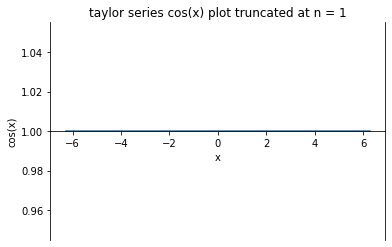

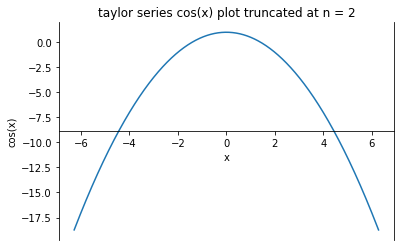

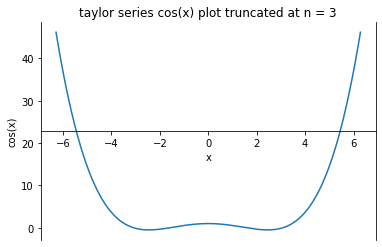

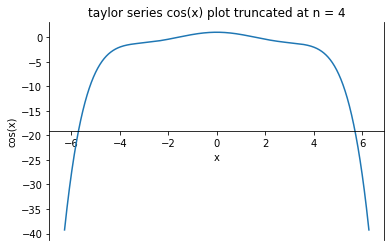

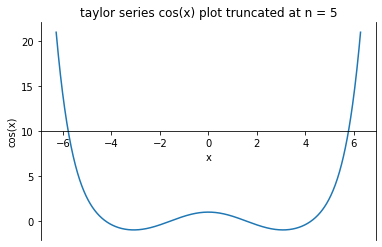

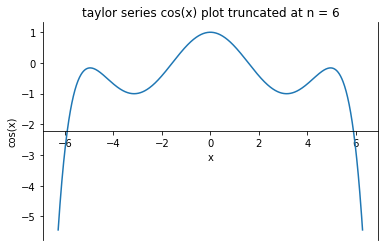

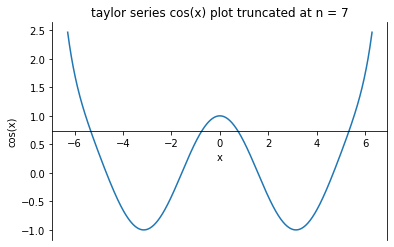

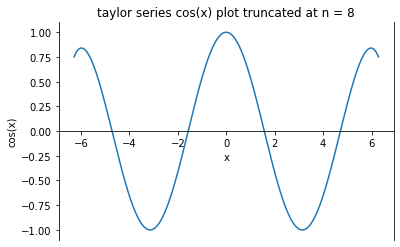

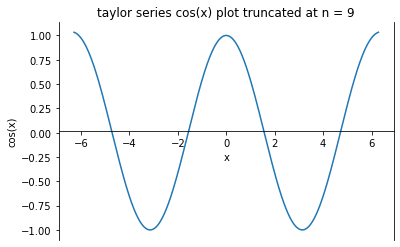

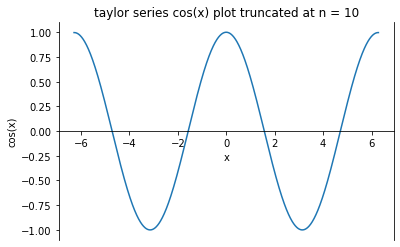

In [6]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000

for trunc in range(1, 11):
    plot_taylor_cos(domain_start, domain_end, spacing, trunc)

##### Conclusion for [Graphing the taylor series function truncated up to 10 intervals]
From the above plot we can see that as we increase the number of terms for the calculating the value of cos(x) where $x \in [-2\pi, 2\pi]$ the approximation of the function improves i.e. more terms is directly propertional to better approximation.



#### Plotting real vs estimated values

For this section I'm examining how fast the taylor series converges to the real value of cos(x) for some commonly used points of interest x

Chosen points of interest
$$
x \in \{0, \frac{\pi}{6}, \frac{\pi}{4}, \frac{\pi}{2}, \pi, \frac{3\pi}{2}, 2\pi\}
$$

Below, I am plotting a red horizontal line which represents the real value of $cos(x)$ for a particular domain value x, along with a scatter plot where the y axis shows the value of the estimation and the x axis shows the number of terms the taylor series was truncated at.

In [7]:
def plot_real_vs_estimate(domain: int, terms: int, str_title) -> None:
    real_y = np.cos(domain)

    # IMPORTANT ===========================================================================
    # range_terms = number of terms after which taylor series will be truncated
    range_terms = range(1, terms+1)
    # estimate_y = estimated value of cos(domain) truncated at various levels up to terms
    estimate_y = [taylor_cos(domain, i) for i in range_terms]
    # =====================================================================================

    # Plotting the graph ==================================================================
    # add line for real value
    plt.axhline(y=real_y, color='r', linestyle='-', label=f"cos({domain}) real")
    
    # plt.figure(dpi=PLOT_DPI)
    plt.scatter(range_terms, estimate_y, label=f"cos({domain}) estimate")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Number of terms taylor series is truncated at')
    plt.ylabel('Value')
    plt.title(str_title)
    plt.xticks(range(2, terms+1, 2))
    plt.show()

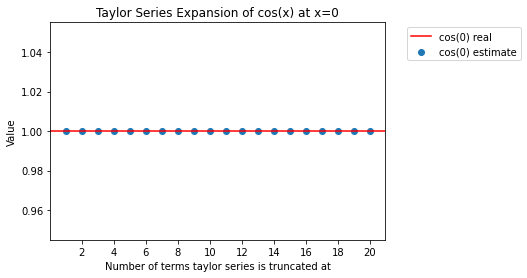

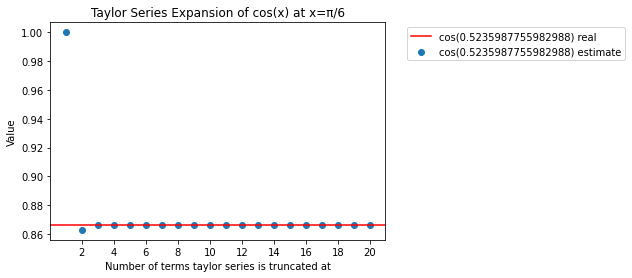

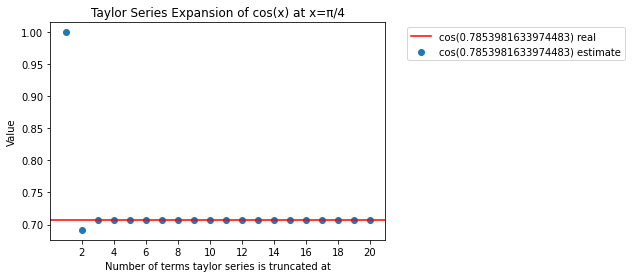

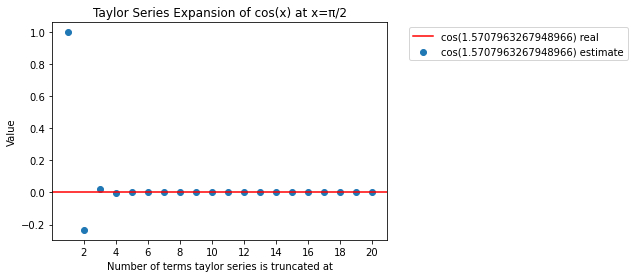

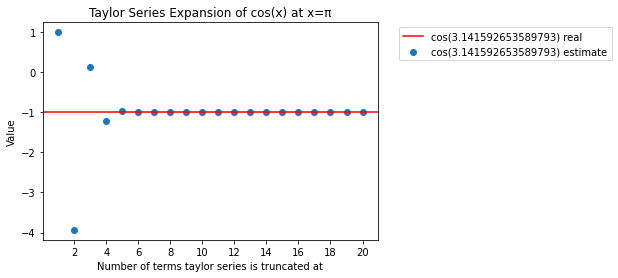

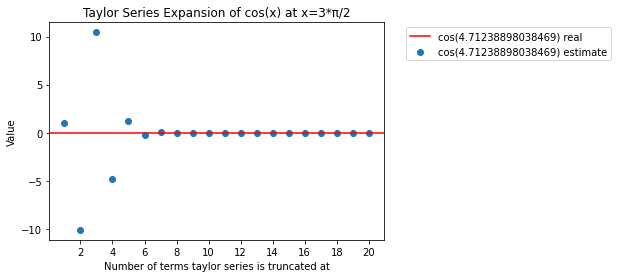

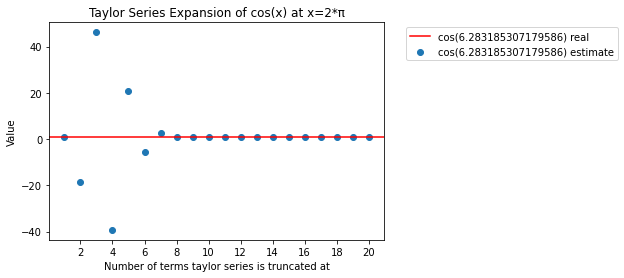

In [8]:
domain = [0, np.pi/6, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
domain_str = ['0', 'π/6', 'π/4', 'π/2', 'π', '3*π/2', '2*π']
max_terms = 20

for i, d in enumerate(domain):
    plot_real_vs_estimate(d, max_terms, f"Taylor Series Expansion of cos(x) at x={domain_str[i]}")

##### Conclusion for [Plotting real vs estimated values]

From the above plot we can observe that values close to 0 require less terms in the taylor series before they converge to the real value. Conversely values farther away from 0 require more terms before converging to the real value

#### Showing the above plot in printed form

This shows the actual calculated values of the taylor series for the chosen points of interest.
Furthermore, this also shows that at point 100 when the domain value is quite large, even 10 terms isn't sufficient to get a good approximation of the real value of cos(x).

In [9]:
def print_estimate(domain: int, terms: int) -> None:
    real = np.cos(domain)
    estimates = [taylor_cos(domain, i) for i in range(1, terms+1)]
    print("Domain value: ", domain)
    print(f"Real value: {real}")
    print("Estimate Values")
    for i in range(terms):
        print(f"n={i+1}: {estimates[i]}")
    print("\n")

In [10]:
# domain
x = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, 100]
x_str = ['0', 'π/4', 'π/2', 'π', '3*π/2', '2*π', '100']
terms = 10
for i, domain in enumerate(x):
    print(f"Taylor Series Expansion of cos(x) at x={x_str[i]}")
    print_estimate(domain, terms)

Taylor Series Expansion of cos(x) at x=0
Domain value:  0
Real value: 1.0
Estimate Values
n=1: 1.0
n=2: 1.0
n=3: 1.0
n=4: 1.0
n=5: 1.0
n=6: 1.0
n=7: 1.0
n=8: 1.0
n=9: 1.0
n=10: 1.0


Taylor Series Expansion of cos(x) at x=π/4
Domain value:  0.7853981633974483
Real value: 0.7071067811865476
Estimate Values
n=1: 1.0
n=2: 0.6915748624659576
n=3: 0.707429206709773
n=4: 0.7071032148228457
n=5: 0.7071068056832942
n=6: 0.7071067810719247
n=7: 0.7071067811869363
n=8: 0.7071067811865466
n=9: 0.7071067811865476
n=10: 0.7071067811865476


Taylor Series Expansion of cos(x) at x=π/2
Domain value:  1.5707963267948966
Real value: 6.123233995736766e-17
Estimate Values
n=1: 1.0
n=2: -0.23370055013616975
n=3: 0.019968957764878226
n=4: -0.0008945229984747317
n=5: 2.473727636469452e-05
n=6: -4.6476600836607633e-07
n=7: 6.321469515740575e-09
n=8: -6.513356455746522e-11
n=9: 5.260665923294585e-13
n=10: -3.3734277440034317e-15


Taylor Series Expansion of cos(x) at x=π
Domain value:  3.141592653589793
Real v

### Part 1.2

#### Small angle theorem

This states that for sufficiently small values of x, the following holds true

$$
cos(x) = 1 - \frac{x^2}{2}
$$

The task is to find how small the value of $x$ needs to be for it to hold, given an tolerance of 0.01% relative error.

#### Relative error

$$
\text{Relative error} = \frac{\text{Absolute error}}{\text{True value}} * 100\%   \\

\text{Absolute error} = |\text{Approximate} - \text{True value} |

$$

#### Assumptions
1. I am assuming that the builtin cos function provides the actual value and plot

In [11]:
small_angle_theorem = lambda x: 1 - ((x**2)/2)
tolerance = 0.0001

#### Plot actual cosine vs theorem approximation

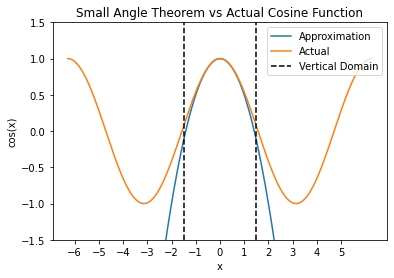

In [12]:
domain = np.linspace(-2*math.pi, 2*math.pi, 1000)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.cos(x) for x in domain]

# plot approximation
plt.plot(domain, range_approx, label='Approximation')
# plot actual
plt.plot(domain, range_actual, label='Actual')

# draw vertical dotted lines at 1.5 and -1.5
vertical_domain = 1.5
plt.axvline(x=vertical_domain, color='black', linestyle='--', label='Vertical Domain')
plt.axvline(x=-vertical_domain, color='black', linestyle='--')

plt.ylim(-1.5, 1.5) # limit y axis between 2 and -2
plt.xticks(np.arange(-6, 6, 1)) # label x axis at intervals of 1
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Small Angle Theorem vs Actual Cosine Function')
plt.legend(loc='upper right')

plt.show()

From the above graph we can see that at some domain between -1.5 and 1.5, the values of the actual cosine function and the approximation (small angle theorem) intersect presumably with a tolerance less than the required 0.01%

Next, I will just be finding that necessary range where the requirement of the tolerance holds true.

In [13]:
def relative_error(approx, actual):
    return abs((approx - actual) / actual)

Approximation is within tolerance of actual for all values in domain between -0.22000000000019604 and 0.22009999999975527


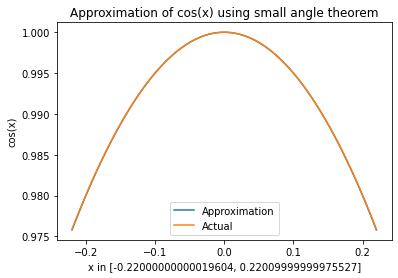

In [14]:
domain = np.arange(-2, 2, tolerance)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.cos(x) for x in domain]

errors = [relative_error(approx, actual) for approx, actual in zip(range_approx, range_actual)]

# domain where approximation is equal to actual within tolerance
tolerance_domain = [True if error < tolerance else False for error in errors]

# find index of first True and last True in tolerance_domain
first_true = tolerance_domain.index(True)
last_true = len(tolerance_domain) - tolerance_domain[::-1].index(True)

# check if all the values between first_true and last_true are True
all_true = all(tolerance_domain[first_true:last_true])
if all_true:
    print(f'Approximation is within tolerance of actual for all values in domain between {domain[first_true]} and {domain[last_true]}')

"""
The above is just a nice way of doing the following
domain_start = 0
for i, error in enumerate(errors):
    if error < tolerance:
        domain_start = i
        break

domain_end = 0
for i, error in enumerate(reversed(errors)):
    if error < tolerance:
        domain_end = len(errors) - i
        break
"""


plt.plot(domain[first_true:last_true], range_approx[first_true:last_true], label='Approximation')
plt.plot(domain[first_true:last_true], range_actual[first_true:last_true], label='Actual')
plt.title('Approximation of cos(x) using small angle theorem')
plt.xlabel(f'x in [{domain[first_true]}, {domain[last_true]}]')
plt.ylabel('cos(x)')
plt.legend()
plt.show()



### Part 1.3

#### taylor series for tan(x) around 0

$tan(x)$ can be defined in terms of $sin(x)$ and $cos(x)$ as follows:

$$
tan(x) = \frac{sin(x)}{cos(x)}
$$

Furthermore, sin(x) and cos(x) can be defined as approximations using their respective taylor series:

$$
sin(x) = \sum_{n=0}^{\infty} (-1)^n * \frac{x^{2n+1}}{(2n+1)!} \\

cos(x) = \sum^{\infty}_{n=0} (-1)^n * \frac{x^{2n}}{(2n)!}
$$

Substituting these into the definition of $tan(x)$, we get:
$$
tan(x) = \frac{\text{Taylor series of sin(x)}}{\text{Taylor series of cos(x)}}
$$

In [15]:
def taylor_cos(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i) / math.factorial(2*i)) for i in range(n)])

In [16]:
def taylor_sin(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of sin(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i + 1) / math.factorial(2*i + 1)) for i in range(n)])

In [17]:
def taylor_tan(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of tan(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return taylor_sin(x, n) / taylor_cos(x, n)

In [18]:
def plot_taylor_tan(domain_start, domain_end, spacing, truncate):
    """Plots the taylor series expansion of tan(x) at x=0

    Args:
        domain_start (int): starting domain value
        domain_end (int): ending domain value
        spacing (int): spacing between domain values
        truncate (int): number of terms to truncate the taylor series expansion
    """
    x = np.linspace(domain_start, domain_end, spacing)
    y = [taylor_tan(i, truncate) for i in x]
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('tan(x)')
    plt.title('taylor series tan(x) plot truncated at n = ' + str(truncate))
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.ylim(-10, 10)
    plt.plot(x, y)
    plt.show()

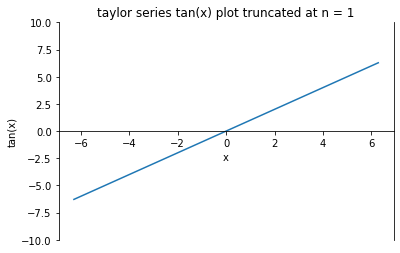

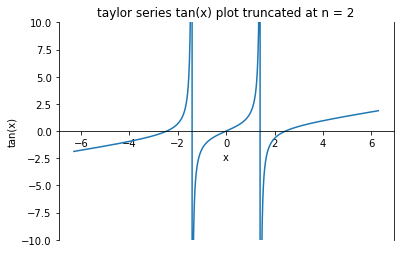

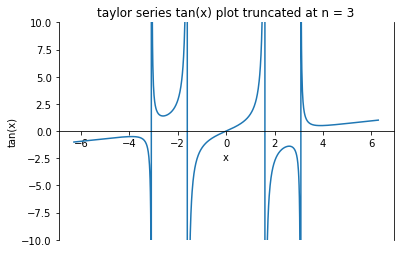

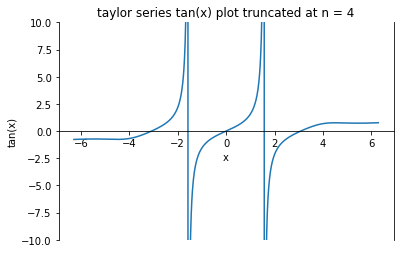

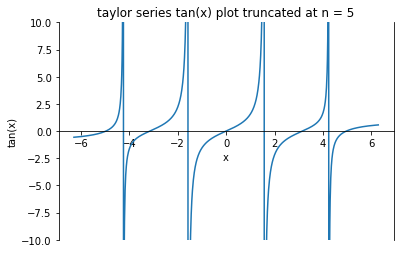

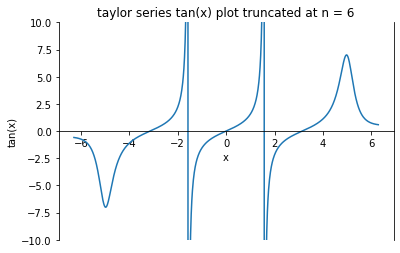

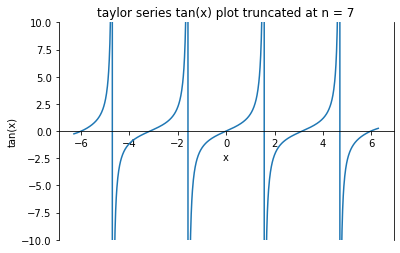

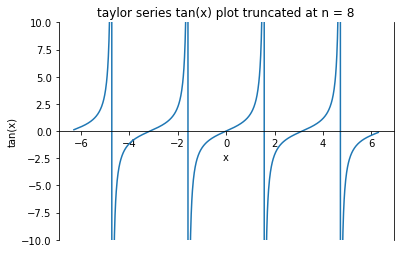

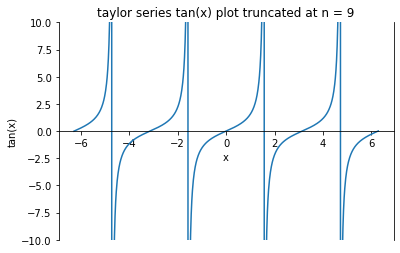

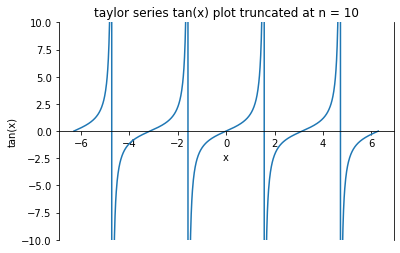

In [19]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000

for trunc in range(1, 11):
    plot_taylor_tan(domain_start, domain_end, spacing, trunc)

#### plot real vs estimated values

In [20]:
def plot_real_vs_estimate_tan(domain: int, terms: int, str_title) -> None:
    real = np.tan(domain)
    estimates = [taylor_tan(domain, i) for i in range(1, terms+1)]

    # plt.figure(dpi=PLOT_DPI)
    plt.scatter(range(1, terms+1), estimates, label=f"tan({domain}) estimate")
    # add line for real value
    plt.axhline(y=real, color='r', linestyle='-', label=f"tan({domain}) real")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Number of terms')
    plt.ylabel('Value')
    plt.title(str_title)
    plt.xticks(range(2, terms+1, 2))
    plt.show()

#### Examining real vs estimated value for tan(x) for certain points of interest on the domain

Note: I have excluded the values where tan(x) is undefined.

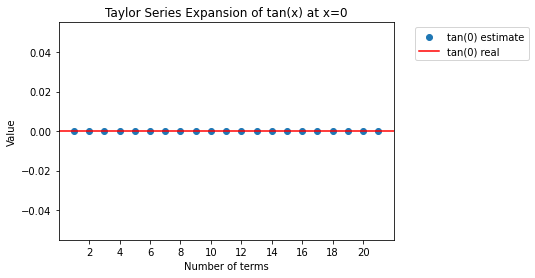

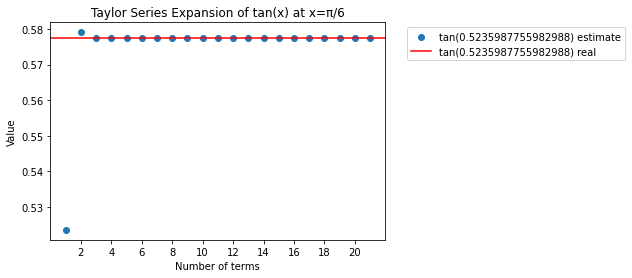

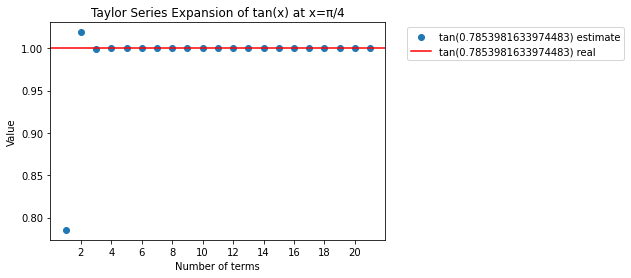

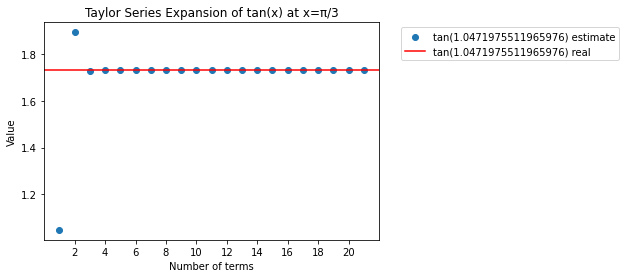

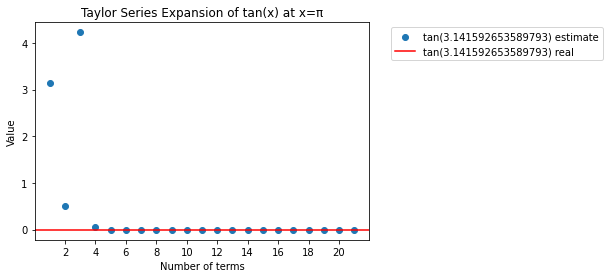

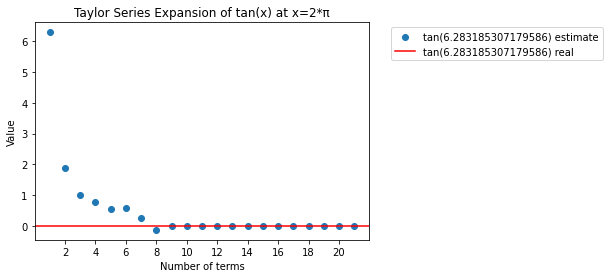

In [21]:
domain = [0, np.pi/6, np.pi/4, np.pi/3, np.pi, 2*np.pi]
domain_str = ['0', 'π/6', 'π/4', 'π/3', 'π', '2*π']
max_terms = 21

for i, d in enumerate(domain):
    plot_real_vs_estimate_tan(d, max_terms, f"Taylor Series Expansion of tan(x) at x={domain_str[i]}")

#### Small angle theorem

This states that for sufficiently small values of x, the following holds true

$$
tan(x) \approx x
$$

The task is to find how small the value of $x$ needs to be for it to hold, given an tolerance of 0.01% relative error.

#### Relative error

$$
\text{Relative error} = \frac{\text{Absolute error}}{\text{True value}} * 100\%   \\

\text{Absolute error} = |\text{Approximate} - \text{True value} |

$$

#### Assumptions
1. I am assuming that the builtin cos function provides the actual value and plot

In [22]:
small_angle_theorem = lambda x: x
tolerance = 0.0001

#### Plot actual tangent vs theorem approximation

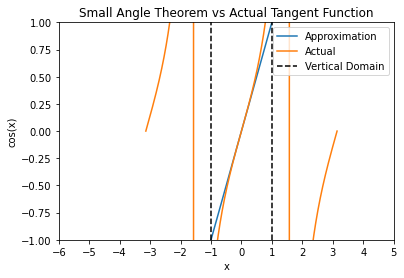

In [23]:
domain = np.linspace(-np.pi, np.pi, 1000)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.tan(x) for x in domain]

# plot approximation
plt.plot(domain, range_approx, label='Approximation')
# plot actual
plt.plot(domain, range_actual, label='Actual')

# draw vertical dotted lines at 1.5 and -1.5
vertical_domain = 1
plt.axvline(x=vertical_domain, color='black', linestyle='--', label='Vertical Domain')
plt.axvline(x=-vertical_domain, color='black', linestyle='--')

plt.ylim(-1, 1) # limit y axis between 2 and -2
plt.xticks(np.arange(-6, 6, 1)) # label x axis at intervals of 1
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Small Angle Theorem vs Actual Tangent Function')
plt.legend(loc='upper right')

plt.show()

From the above graph we can see that at some domain between -1 and 1, the values of the actual tangent function and the approximation (small angle theorem) intersect presumably with a tolerance less than the required 0.01%

Next, I will just be finding that necessary range where the requirement of the tolerance holds true.

In [24]:
def relative_error(approx, actual):
    return abs((approx - actual) / actual)

Approximation is within tolerance of actual for all values in domain between -0.017300000000218363 and 0.017399999999777815


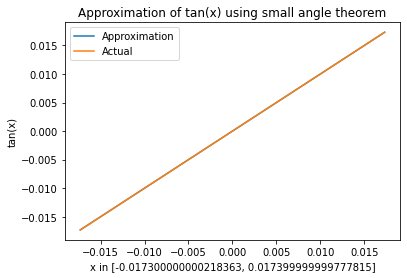

In [25]:
domain = np.arange(-2, 2, tolerance)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.tan(x) for x in domain]

errors = [relative_error(approx, actual) for approx, actual in zip(range_approx, range_actual)]

# domain where approximation is equal to actual within tolerance
tolerance_domain = [True if error < tolerance else False for error in errors]

# find index of first True and last True in tolerance_domain
first_true = tolerance_domain.index(True)
last_true = len(tolerance_domain) - tolerance_domain[::-1].index(True)

# check if all the values between first_true and last_true are True
all_true = all(tolerance_domain[first_true:last_true])
if all_true:
    print(f'Approximation is within tolerance of actual for all values in domain between {domain[first_true]} and {domain[last_true]}')

plt.plot(domain[first_true:last_true], range_approx[first_true:last_true], label='Approximation')
plt.plot(domain[first_true:last_true], range_actual[first_true:last_true], label='Actual')
plt.title('Approximation of tan(x) using small angle theorem')
plt.xlabel(f'x in [{domain[first_true]}, {domain[last_true]}]')
plt.ylabel('tan(x)')
plt.legend()
plt.show()



## Part 2
---

$$
\text{Data Error} = f(\widetilde{x}) - f(x) \\
$$
Where,

$\widetilde{x}$ is an inexact measurement of x. In this case, $\widetilde{x}$ is the inexact measurement of $\pi$.

### Assumptions
1. I am assuming that inbuilt the value of pi (np.pi) is sufficiently accurate approximation of $\pi$.

### Given function

$$
f(x) = cos(2 \pi x)
$$

In [26]:
part2_function = lambda x, pi: np.cos(2 * pi * x)

### Defining the various measurements of $\pi$:

In [27]:
real_pi = np.pi
# use real pi to get values at various precisions
# +2 includes the first and the last digit
pi_values = [float(str(real_pi)[:i]) for i in range(2, 10+2)]
print(f'These are the pi values at various precisions ranging from [0 to {len(pi_values)-1}] decimals placees')
print(pi_values)

These are the pi values at various precisions ranging from [0 to 9] decimals placees
[3.0, 3.1, 3.14, 3.141, 3.1415, 3.14159, 3.141592, 3.1415926, 3.14159265, 3.141592653]


### Plotting function $f(x)$ with various precisions of $\pi$ compared to the inbuilt value of $\pi$:

In [28]:
def plot_function(domain_start: int, domain_end: int, n: int = 0.001):
    x_values = np.arange(domain_start, domain_end, n)
    real_y = [part2_function(x, real_pi) for x in x_values]
    y_values = [[part2_function(x, pi) for x in x_values] for pi in pi_values]

    # plt.figure(dpi=PLOT_DPI)
    for i, y in enumerate(y_values):
        plt.plot(x_values, y, label=f"cos(2πx) pi={pi_values[i]}")

    plt.plot(x_values, real_y, color='black', label=f"cos(2πx) real")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('cos(2πx) with different values of pi')
    plt.show()

#### What happens to the plot around the point 0

Around the point 0, as shown below - most of the values of pi have a decent approximation of the true value of pi; however as the value of $x$ (domain) increases, the error in the approximation of $\pi$ increases. Although the error increases, it only appears to be growing significantly when the value of $\pi$ is represented with less than 2 decimal places; more than 2 decimal places, the error does not appear significant.

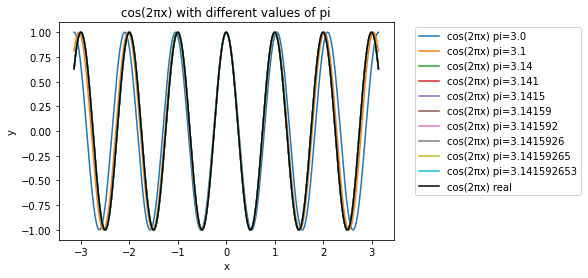

In [29]:
plot_function(-np.pi, np.pi)

#### What happens at large values of x?

Now, lets observe what happens when the value of $x$ grows.
As shown in the plot below, the error in pi values with less than 2 decimal places have grown quite a bit, furthermore, we can also observe that the value with 2 decimal place (i.e. 3.14) is also starting to show some deviation from the true valie, however, the error is still not significant. The values of pi with 3+ decimal places are basically overlapping with the true value of pi.

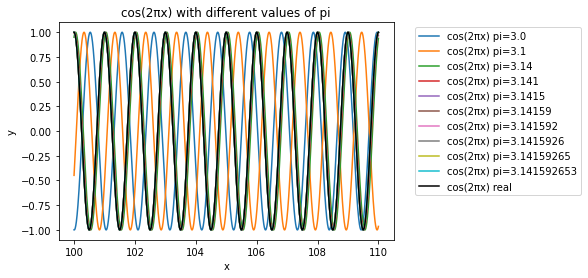

In [30]:
plot_function(100, 110)

#### Closely examining the plot at large values of x

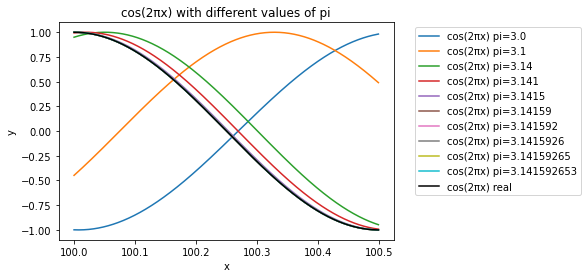

In [31]:
plot_function(100, 100.5)

#### Lets to even larger to see if the results are consistent
As shown below, the values of pi with more decimal places are more close to the true value of pi and hence have less error.

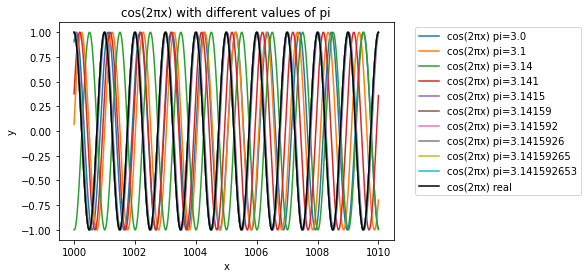

In [32]:
plot_function(1000, 1010)

#### What does this mean for the accuracy of the function?

Depending on the use case of the function and if you're dealing with small values of x, the function is fairly accurate with even 2 decimal places of pi. However, if you're dealing with large values of x, you would need more decimal places of pi to get an accurate result.

### Plotting the error in the function $f(x)$ with various precisions of $\pi$ compared to the inbuilt value of $\pi$:

In [33]:
def get_data_error(domain_start: int, domain_end: int, pi_value, n: int = 1000):
    x_values = np.linspace(domain_start, domain_end, n)
    real_y = [part2_function(x, real_pi) for x in x_values]
    y_values = [part2_function(x, pi_value) for x in x_values]
    # data error = f(estimate) - f(real)
    data_error = [real_y[i] - y_values[i] for i in range(n)]
    return data_error

In [34]:
def plot_error(domain_start: int, domain_end: int, n: int = 1000):
    # get data error for all pi values
    data_errors = [get_data_error(domain_start, domain_end, pi, n) for pi in pi_values]
    x_values = np.linspace(domain_start, domain_end, n)
    # plt.figure(dpi=PLOT_DPI)
    for i, error in enumerate(data_errors):
        plt.plot(x_values, error, label=f"pi={pi_values[i]}")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel('x')
    plt.ylabel('error')
    plt.title('Error in cos(2πx) with different values of pi')
    plt.show()

#### Error vs x
The plot below shows how fast the error grows as the value of x increases. As we can see, the error grows significantly when the value of pi is represented with less than 2 decimal places. The error is almost negligible when the value of pi is represented with 2+ decimal places.

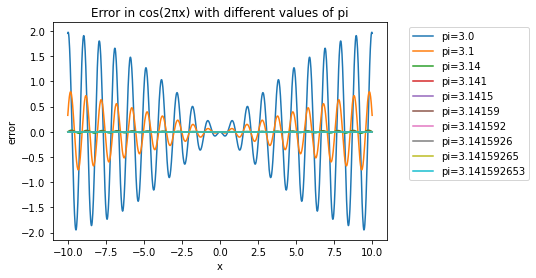

In [35]:
plot_error(-10, 10)

#### Error vs x for large values of x
As x grows we can again see that the error for pi values with less than 3 decimal places is significant. The error for pi values with 3+ decimal places is almost negligible.

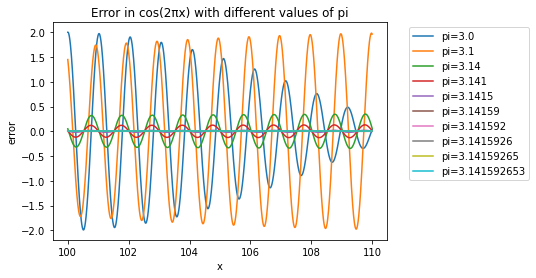

In [36]:
plot_error(100, 110)

## Part 3 - Sensitivity and condition number
---

### Preamble

Forward Error = Difference between computed and true value

Backward Error - Discrepancy in the input that would lead to the observed discrepancy in output

Condition number - Sensitivity of the output to changes in the input

A high condition number is bad because it means that small changes in the input can lead to large changes in the output. This is bad because it means that the output is not stable and can be very different from the true value.


### Measuring Sensitivity of function $f(x) = cos(2 \pi x)$

In [ ]:
func_real = lambda x: np.cos(2 * np.pi * x)

def truncated_taylor_cos(x: int, n: int=10, truncate_after_first_nonzero=True) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    total = 0
    for i in range(n):
        if truncate_after_first_nonzero and total != 0:
            return total
        total += np.sum((-1)**i * (x**(2*i) / math.factorial(2*i)))
    return total

##### Sources of error

1. Truncating taylor series expansion of cos function after the first non 0 term. In every case this is equal to 1
2. The input x is rounded to 3 significant figures. This just means that the domain will have increments of $0.001$ because this is the smallest decimal fraction up to 3 decimal places.

#### Method 1: Computing ratio between backward and forward error

$$
\begin{align*}
\text{Forward Error:  } 
& |\Delta y| = | \widetilde{y} - y | \\

\text{Backward Error:  } 
& |\Delta x| = | \widetilde{x} - x |
\end{align*}

\\

\text{Condition Number} = 

\frac{|\frac{\Delta y}{y}|}{|\frac{\Delta x}{x}|} = \frac{\text{Relative forward error}}{\text{Relative backward error}}
$$


In [ ]:
def forward_error(real_function, estimated_function, domain):
    return abs(real_function(domain) - estimated_function(domain))

def backward_error(domain):
    return domain

def sensitivity_method_1(real_function, estimated_function, domain):
    
    return abs(forward_error(real_function, estimated_function, domain) / backward_error(domain))

#### Method 2: Using approximation formula

##### Formula for Condition number

$$
\text{Condition number} = |\frac{x*f'(x)}{f(x)}|
$$

##### Derving Condition number for $f(x)=cos(2 \pi x)$

###### Derivative of the function
$$
\begin{align*}
& f(x) = cos(2 \pi x) \\

& \text{Using chain rule} \\
& f'(x) = -sin(2 \pi x) * \frac{d}{dx} (2 \pi x) \\
& f'(x) =  -sin(2 \pi x) * 2 \pi \\
& f'(x) =  - 2 \pi sin(2 \pi x) \\
\end{align*}
$$

###### Calculating condition number

$$
\begin{gather}
    \text{Condition number} = \frac{x * -2 \pi sin(2 \pi x)}{cos(2 \pi x)} \\ 
    \text{Condition number} = -2 \pi x * tan(2 \pi x)
\end{gather}
$$

Although simplified to tan, I will be using equation (1) to introduce truncation error for the function 

In [ ]:
def sensitivity_method_2(domain):
    numberator = domain * -np.sin(2 * np.pi * domain) # cos function doesnt need to be approximated
    # per the specifications, only the cosine function is approximated using the taylor series till the first non 0 term
    denominator = truncated_taylor_cos(domain)
    return numberator / denominator

Text(0.5, 1.0, 'Sensitivity of the Taylor Series Approximation of cos(x)')

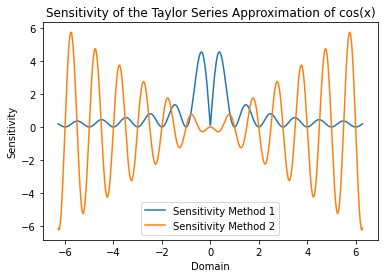

In [ ]:
# use method 1 to calculate the sensitivity
domain = np.linspace(-2*np.pi, 2*np.pi, 1000)
sensitivity1 = [sensitivity_method_1(func_real, truncated_taylor_cos, float(round(x, 3))) for x in domain]
sensitivity2 = [sensitivity_method_2(x) for x in domain]

plt.plot(domain, sensitivity1, label="Sensitivity Method 1")
plt.plot(domain, sensitivity2, label="Sensitivity Method 2")
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of the Taylor Series Approximation of cos(x)")

In the above plot, we can see that method 1 doesn't start off very well however as the domain increases, the condition number improves, while the condition number for method 2 is growing.

This is because of the problem is ill-conditioned and has a "bad" approximation, which makes the condition number grow as the domain increases.

Since we are approximating the value of cos x using the taylor/maclaurin expansion up to the first non zero term (which is 1 in every case), we are approximating $cos(k) = -2 \pi * sin (k)$ where $k=2 \pi x$. Additionally, I also know that the truncated cos expansion can be represented by $cos(k) = 1$ which is the first non zero term in the expansion.
$$
cos(k) = -2 \pi * sin(k) \\
cos(k) = 1 \\
-2 \pi x * sin(k) = 1 \\
-k * sin(k) = 1 \\

f(k) = -k * sin(k) - 1 \\


sin(x) = 1 \rightarrow x = 2n \pi + \frac{\pi}{2} \\


cos(x) = 1 \rightarrow x = 2n \pi \\

$$

The above essentially shows that the cosine function cannot be modelled well using a sine function multiplied by a constant. This is why the condition number is growing as the domain increases.

C:\Users\rishi\AppData\Local\Temp\ipykernel_5440\117531179.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return abs(forward_error(real_function, estimated_function, domain) / backward_error(domain))


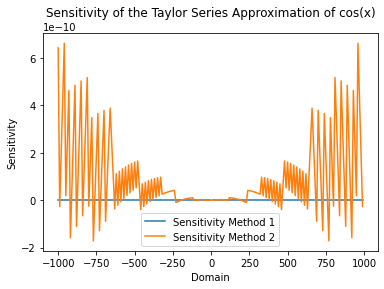

In [ ]:
# showing the plot on a larger domain size
# domain = np.arange(-1000, 1000, 0.001)
domain = np.arange(-1000, 1000, 10)
sensitivity1 = [sensitivity_method_1(func_real, truncated_taylor_cos, float(round(x, 3))) for x in domain]
sensitivity2 = [sensitivity_method_2(x) for x in domain]

plt.plot(domain, sensitivity1, label="Sensitivity Method 1")
plt.plot(domain, sensitivity2, label="Sensitivity Method 2")
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of the Taylor Series Approximation of cos(x)")
plt.show()

---

In [ ]:
domain = np.arange(-2, 2, 0.001)

#### Real function vs approximation

As shown in the graph below, the approximation formula only returns the value 1 because of the provided "sources of error". This being the case, the approximation is more accurately modelling the function $f(x) = 1$ rather than $f(x) = cos(2 \pi x)$, however, these functions do intersect at certain domain values i.e. for certain values of x the function $f(x) = cos(2 \pi x)$ and $f(x) = 1$ will have the same value. Essentially the approximation is "very bad".

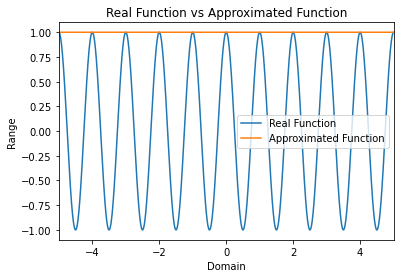

In [ ]:
tolerance = 0.001
dom = 50
domain = np.arange(-dom, dom, tolerance)
# plot the graph
real_range = [func_real(domain) for domain in domain]
approx_range = [truncated_taylor_cos(2 * np.pi * domain) for domain in domain]

plt.title("Real Function vs Approximated Function")
plt.plot(domain, real_range, label="Real Function")
plt.plot(domain, approx_range, label="Approximated Function")
plt.xlim(-5, 5)
plt.xlabel("Domain")
plt.ylabel("Range")
plt.legend()
plt.show()

[16775, 34787, 48624]


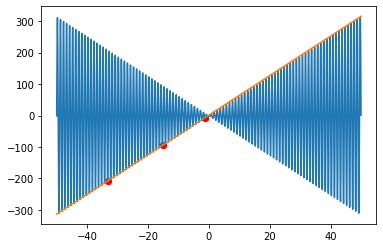

In [ ]:
# ATTEMPT: to show the intersection of the two functions using general form
# Didn't really work out as expected - likely because no real solutions exist

k = lambda x: 2 * np.pi * x
func = lambda x: -k(x) * np.sin(k(x)) - 1
func_range = [func(x) for x in domain]

sinx_1 = lambda n: 2 * np.pi * n + (np.pi/2)
sinx_1_range = [sinx_1(x) for x in domain]

difference = [abs(func_range[i] - sinx_1_range[i]) for i in range(len(domain))]
tolerated = [True if difference < 0.001 else False for difference in difference]
tolerated_index = [i for i in range(len(tolerated)) if tolerated[i]]
print(tolerated_index)

plt.plot(domain, func_range, label='f(x)')
plt.plot(domain, sinx_1_range, label='f\'(x)')

# scatter plot of the tolerated values
tolerated_domain = [domain[i] for i in tolerated_index]
tolerated_func_range = [func_range[i] for i in tolerated_index]
tolerated_sinx_1_range = [sinx_1_range[i] for i in tolerated_index]
plt.scatter(tolerated_domain, tolerated_func_range, color='red')
plt.scatter(tolerated_domain, tolerated_sinx_1_range, color='red')